In [1]:
import pandas as pd 

data = pd.read_table("../dataset/Emotion_final.csv", sep=',')
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [2]:
data.shape

(21459, 2)

In [3]:
data.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


<AxesSubplot:>

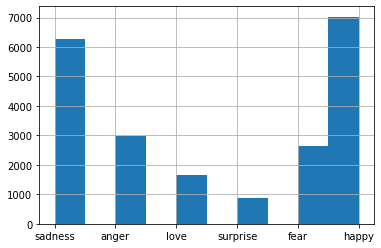

In [4]:
data['Emotion'].hist()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

converter = CountVectorizer(stop_words={'english'})
text_matrix = converter.fit_transform(data['Text'])
text_matrix = text_matrix.toarray()

In [6]:
text_matrix.shape

(21459, 19210)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

labels = data['Emotion'].values
etiquetes = np.unique(labels).tolist()
index_etiquetes = []
for i in range(len(etiquetes)) :
    index_etiquetes.append(i)
    for j in range(len(labels)) :
        if labels[j] == etiquetes[i]:
            labels[j] = i
            
X_train, X_test, y_train, y_test = train_test_split(text_matrix, labels, stratify=labels, test_size=0.2, train_size=0.8)

In [9]:
from libsvm.svmutil import svm_save_model, svm_load_model, svm_predict, svm_train

In [ ]:
model_svm = svm_train(y_train, X_train, "-s 0 -t 1 -d 6 -r 4")
svm_save_model("model_svm_emotion", model_svm)

In [10]:
model_svm = svm_load_model("model_svm_emotion")
ypred,_,_ = svm_predict(y_test, X_test, model_svm)

Accuracy = 95.8993% (4116/4292) (classification)


In [11]:
np.unique(ypred)

array([0., 1., 2., 3., 4., 5.])

In [20]:
def transform_dataframe(mat, etiquettes):
    p = pd.DataFrame(mat , columns = etiquettes)
    p.index = etiquettes
    return p
    
def confusion_matrix(y_true, y_pred, labels):
    etiquetes = np.array(labels)
    n = len(etiquetes)
    matrix = np.zeros((n,n), dtype='int32')
    y_len = len(y_true)
    
    for i in range(n) :
        for j in range(n):
            for k in range(y_len):
                if(y_true[k] == etiquetes[i] and y_pred[k] == etiquetes[j]):
                    matrix[i][j]+=1
            
    return matrix


In [21]:

gr = confusion_matrix(y_test, ypred, index_etiquetes)
transform_dataframe(gr, etiquetes)
    

,anger,fear,happy,love,sadness,surprise
anger,579,3,2,2,13,0
fear,7,505,6,0,8,4
happy,6,4,1361,18,15,2
love,0,0,26,302,0,0
sadness,12,17,8,5,1209,2
surprise,1,8,7,0,0,160
